In [65]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('clean_vacancy_data.csv', index_col='Date')

In [67]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [68]:
df.head()

,Year,Quarter,United States,Inside MSAs,Inside Principal Cities1,Outside Principal Cities1 (Suburbs),Outside MSAs,Northeast,Midwest2,South,West,Month
Date,,,,,,,,,,,,
1956-01-01,1956,1,6.2,4.8,NaN,NaN,8.9,3.3,5.2,7.9,9.7,1
1956-04-01,1956,2,5.9,4.8,NaN,NaN,8.1,2.7,5.3,8.1,9.3,4
1956-07-01,1956,3,6.3,5.1,NaN,NaN,8.3,3.3,6.3,8.5,8.3,7
1956-10-01,1956,4,5.8,4.6,NaN,NaN,8.0,3.1,5.6,8.1,7.4,10
1957-01-01,1957,1,5.3,4.2,NaN,NaN,7.1,3.5,5.0,6.4,6.9,1


In [69]:
model = pm.auto_arima(df['United States '], 
                      seasonal=True, 
                      m=4,
                      stepwise=True,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=123.434, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=152.915, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=121.561, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=123.817, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=150.920, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=142.390, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=123.136, Time=0.58 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=123.010, Time=0.56 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : AIC=124.304, Time=0.24 sec
 ARIMA(1,1,0)(2,0,1)[4] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=130.570, Time=0.93 sec
 ARIMA(2,1,0)(1,0,0)[4] intercept   : AIC=122.120, Time=0.85 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=122.654, Time=1.11 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=120.656, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=142.476, 

In [71]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  274
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 4)   Log Likelihood                 -56.329
Date:                            Wed, 25 Sep 2024   AIC                            118.658
Time:                                    07:35:58   BIC                            129.486
Sample:                                01-01-1956   HQIC                           123.005
                                     - 04-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2120      0.060     -3.554      0.000      -0.329      -0.095
ar.S.L4        0.2914      0.062   

In [84]:
forecast, conf_int = model.predict(n_periods=40, return_conf_int=True)

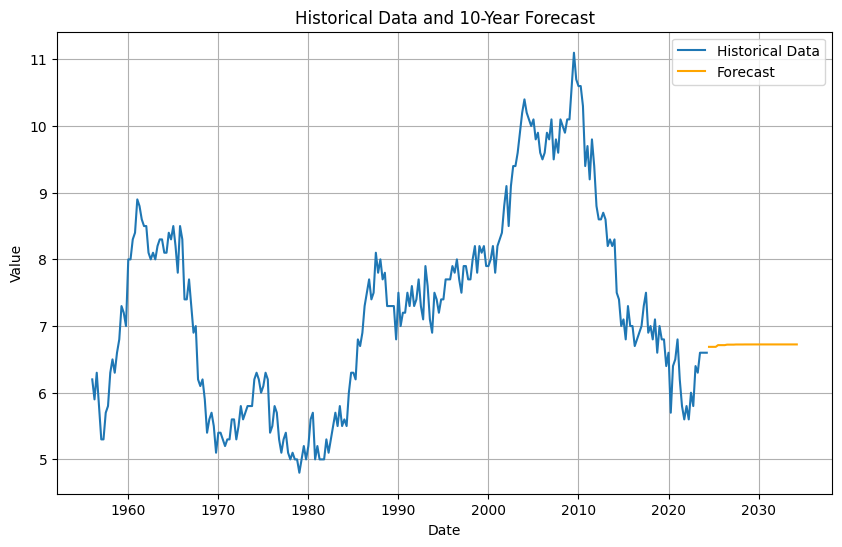

In [85]:
# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df['United States '], label='Historical Data')
plt.plot(pd.Series(forecast), label='Forecast', color='orange')
plt.title('Historical Data and 10-Year Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()